/tmp/ipykernel_573656/3769190015.py:62: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


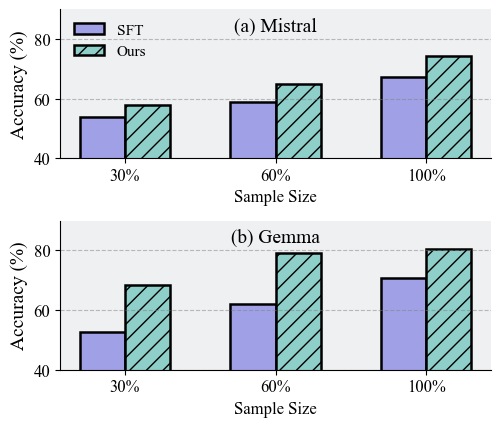

In [42]:
# ── 1)  Prepare both groups ────────────────────────────────────────────────────
data_grp1 = np.array([
    ['30%', '52.66', '56.80'],
    ['60%', '57.99', '63.90'],
    ['100%', '66.27', '73.37'],
])
data_grp2 = np.array([          # ← replace with your second dataset
    ['30%', '51.48', '67.45'],
    ['60%', '60.95', '78.10'],
    ['100%', '69.82', '79.29'],
])

# ── 2)  Shared styling values (keep your originals) ───────────────────────────
bar_width = 0.30
colors = [(160/255.0, 160/255.0, 230/255.0),   # Rel
          (142/255.0, 207/255.0, 201/255.0)]   # Loc (Δ)
labels  = ['SFT', 'Ours']

# ── 3)  Create the 1×2 subplot canvas ─────────────────────────────────────────
fig, axes = plt.subplots(2, 1,
                         figsize=(0.73 * 7, 0.73 * 6),
                         sharey=True,  # same y-axis scale
                         constrained_layout=True)

for ax, data, title in zip(axes,
                           [data_grp1, data_grp2],
                           ['(a) Mistral', '(b) Gemma']):          # subplot titles
    # numbers → float
    vals1 = data[:, 1].astype(float) + 1
    vals2 = data[:, 2].astype(float) + 1
    x_lbls = data[:, 0]

    # bar positions
    idx   = np.arange(len(x_lbls))
    x1, x2 = idx + bar_width, idx + 2*bar_width

    # bars
    ax.bar(x1, vals1, width=bar_width, color=colors[0],
           edgecolor='black', linewidth=1.8, label=labels[0], capsize=2)
    ax.bar(x2, vals2, width=bar_width, color=colors[1],
           edgecolor='black', linewidth=1.8, label=labels[1], capsize=2, hatch='//')

    # cosmetics
    ax.set_facecolor('#EEF0F2')
    ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
    # set title at the bottom of the subplot
    ax.text(0.5, 0.95, title, fontsize=14,
            ha='center', va='top', transform=ax.transAxes)
    ax.set_xlabel('Sample Size', fontsize=12)
    ax.set_xticks(idx + 1.5*bar_width)
    ax.set_xticklabels(x_lbls, fontsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.spines[['top', 'right']].set_visible(False)

axes[0].set_ylabel('Accuracy (%)', fontsize=14)
axes[1].set_ylabel('Accuracy (%)', fontsize=14)
axes[0].set_ylim(40, 70)
axes[1].set_ylim(40, 90)

# put the legend only once (upper left of first subplot)
axes[0].legend(fontsize=11, frameon=False, loc='upper left')
plt.tight_layout()
plt.savefig('plot/ranking_subplots.pdf', dpi=600, bbox_inches='tight')
plt.show()

[np.float64(0.3), np.float64(1.3), np.float64(2.3)]


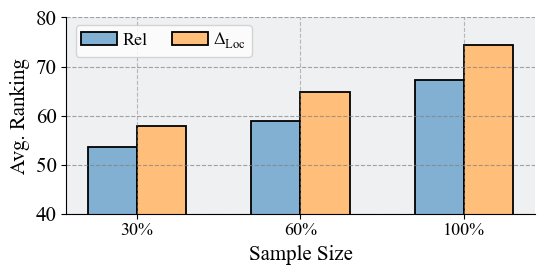